In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/home/sourav/Documents/aapl.csv")

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,7-Jul-17,142.90,144.75,142.90,144.18,19201712
1,6-Jul-17,143.02,143.50,142.41,142.73,24128782
2,5-Jul-17,143.69,144.79,142.72,144.09,21569557
3,3-Jul-17,144.88,145.30,143.10,143.50,14277848
4,30-Jun-17,144.45,144.96,143.78,144.02,23024107


In [7]:
df.tail()

,Date,Open,High,Low,Close,Volume
246,15-Jul-16,98.92,99.30,98.50,98.78,30136990
247,14-Jul-16,97.39,98.99,97.32,98.79,38918997
248,13-Jul-16,97.41,97.67,96.84,96.87,25892171
249,12-Jul-16,97.17,97.70,97.12,97.42,24167463
250,11-Jul-16,96.75,97.65,96.73,96.98,23794945


In [8]:
df1 = df.reset_index()['Close']

In [9]:
df1

0      144.18
1      142.73
2      144.09
3      143.50
4      144.02
        ...  
246     98.78
247     98.79
248     96.87
249     97.42
250     96.98
Name: Close, Length: 251, dtype: float64

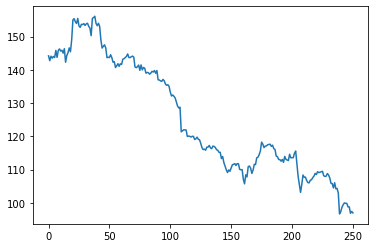

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM are sensitive to scale so we have to apply MinmaxScaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.7994279 ],
       [0.77502945],
       [0.79791351],
       [0.78798587],
       [0.79673566],
       [0.79101464],
       [0.82719165],
       [0.79185597],
       [0.82702339],
       [0.83476359],
       [0.82382635],
       [0.82786471],
       [0.81339391],
       [0.83577318],
       [0.76728925],
       [0.80127882],
       [0.81591789],
       [0.83997981],
       [0.82029278],
       [0.88019519],
       [0.98132256],
       [0.98771664],
       [0.97223624],
       [0.96348645],
       [0.98906276],
       [0.95086657],
       [0.94379943],
       [0.95911156],
       [0.95810197],
       [0.96247686],
       [0.95355881],
       [0.96129901],
       [0.96449605],
       [0.94884738],
       [0.94009759],
       [0.90156487],
       [0.98939929],
       [0.99326939],
       [1.        ],
       [0.96382299],
       [0.95221269],
       [0.96449605],
       [0.94800606],
       [0.87985866],
       [0.83897022],
       [0.84788827],
       [0.85546021],
       [0.839

Splitting the dataset into train test split


In [26]:
training_size = int(len(df1)*0.65)
test_size = len(df1)- training_size
training_data, test_data = df1[0:training_size, :], df1[training_size:, :]

In [27]:
training_data

array([[0.7994279 ],
       [0.77502945],
       [0.79791351],
       [0.78798587],
       [0.79673566],
       [0.79101464],
       [0.82719165],
       [0.79185597],
       [0.82702339],
       [0.83476359],
       [0.82382635],
       [0.82786471],
       [0.81339391],
       [0.83577318],
       [0.76728925],
       [0.80127882],
       [0.81591789],
       [0.83997981],
       [0.82029278],
       [0.88019519],
       [0.98132256],
       [0.98771664],
       [0.97223624],
       [0.96348645],
       [0.98906276],
       [0.95086657],
       [0.94379943],
       [0.95911156],
       [0.95810197],
       [0.96247686],
       [0.95355881],
       [0.96129901],
       [0.96449605],
       [0.94884738],
       [0.94009759],
       [0.90156487],
       [0.98939929],
       [0.99326939],
       [1.        ],
       [0.96382299],
       [0.95221269],
       [0.96449605],
       [0.94800606],
       [0.87985866],
       [0.83897022],
       [0.84788827],
       [0.85546021],
       [0.839

In [28]:
test_data

array([[0.18711089],
       [0.23910483],
       [0.2421336 ],
       [0.23119637],
       [0.20477873],
       [0.22143698],
       [0.25105166],
       [0.24936901],
       [0.28386337],
       [0.28689214],
       [0.2996803 ],
       [0.31835773],
       [0.36311627],
       [0.35302036],
       [0.33535252],
       [0.34309271],
       [0.34410231],
       [0.34999159],
       [0.35133771],
       [0.35268383],
       [0.34174659],
       [0.34780414],
       [0.33030456],
       [0.32609793],
       [0.29261316],
       [0.28975265],
       [0.27561837],
       [0.27477705],
       [0.26670032],
       [0.27561837],
       [0.2609793 ],
       [0.29076224],
       [0.27629144],
       [0.27275787],
       [0.26989736],
       [0.30203601],
       [0.28403163],
       [0.28436816],
       [0.28453643],
       [0.30708396],
       [0.3180212 ],
       [0.25408043],
       [0.18980313],
       [0.14756857],
       [0.10869931],
       [0.14891469],
       [0.196702  ],
       [0.185

In [29]:
#convert an array of values into a dataset matrix
def creat_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        dataX.append(dataset[i:(i+time_step),0])
        dataY.append(dataset[(i+time_step),  0])
    return np.array(dataX),np.array(dataY)

In [30]:
time_step=10
X_train, y_train = creat_dataset(training_data, time_step=time_step)

In [34]:
X_test, y_test = creat_dataset(test_data,time_step)
X_test

array([[0.18711089, 0.23910483, 0.2421336 , 0.23119637, 0.20477873,
        0.22143698, 0.25105166, 0.24936901, 0.28386337, 0.28689214],
       [0.23910483, 0.2421336 , 0.23119637, 0.20477873, 0.22143698,
        0.25105166, 0.24936901, 0.28386337, 0.28689214, 0.2996803 ],
       [0.2421336 , 0.23119637, 0.20477873, 0.22143698, 0.25105166,
        0.24936901, 0.28386337, 0.28689214, 0.2996803 , 0.31835773],
       [0.23119637, 0.20477873, 0.22143698, 0.25105166, 0.24936901,
        0.28386337, 0.28689214, 0.2996803 , 0.31835773, 0.36311627],
       [0.20477873, 0.22143698, 0.25105166, 0.24936901, 0.28386337,
        0.28689214, 0.2996803 , 0.31835773, 0.36311627, 0.35302036],
       [0.22143698, 0.25105166, 0.24936901, 0.28386337, 0.28689214,
        0.2996803 , 0.31835773, 0.36311627, 0.35302036, 0.33535252],
       [0.25105166, 0.24936901, 0.28386337, 0.28689214, 0.2996803 ,
        0.31835773, 0.36311627, 0.35302036, 0.33535252, 0.34309271],
       [0.24936901, 0.28386337, 0.2868921

In [35]:
X_train.shape

(152, 10)

In [36]:
y_train.shape

(152,)

In [38]:
X_test.shape

(77, 10)

Reshape input to be [sample, time_steps, features] which is required for LSTM

In [40]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [42]:
X_train.shape

(152, 10, 1)

creat the stacked LSTM model

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [57]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=X_train.shape[1:], activation='relu'))

In [58]:
model.add(LSTM(50, return_sequences=True, activation='relu'))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 10, 50)            10400     
                                                                 
 lstm_12 (LSTM)              (None, 10, 50)            20200     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
5/5 [==============================] - 9s 412ms/step - loss: 0.4022 - accuracy: 0.0000e+00 - val_loss: 0.0252 - val_accuracy: 0.0130
Epoch 2/100
5/5 [==============================] - 0s 74ms/step - loss: 0.2564 - accuracy: 0.0000e+00 - val_loss: 0.0078 - val_accuracy: 0.0130
Epoch 3/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0839 - accuracy: 0.0066 - val_loss: 0.0709 - val_accuracy: 0.0130
Epoch 4/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0518 - accuracy: 0.0066 - val_loss: 0.1348 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 77ms/step - loss: 0.0352 - accuracy: 0.0066 - val_loss: 0.0510 - val_accuracy: 0.0130
Epoch 6/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0263 - accuracy: 0.0066 - val_loss: 0.0330 - val_accuracy: 0.0130
Epoch 7/100
5/5 [==============================] - 0s 114ms/step - loss: 0.0292 - accuracy: 0.0066 - val_loss: 0.0425 - val_accuracy: 0.0130
Epoch 

In [61]:
import tensorflow as tf

In [62]:
tf.__version__

'2.9.1'

In [63]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 [==============================] - 0s 18ms/step


In [64]:
##Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
test_predict

array([[109.415054],
       [109.82956 ],
       [110.05427 ],
       [110.37499 ],
       [110.85976 ],
       [111.57243 ],
       [112.26439 ],
       [112.83492 ],
       [113.44062 ],
       [113.858   ],
       [114.25902 ],
       [114.56732 ],
       [114.746506],
       [114.634445],
       [114.56451 ],
       [114.54282 ],
       [114.39928 ],
       [114.16738 ],
       [113.823715],
       [113.40488 ],
       [112.93676 ],
       [112.50365 ],
       [112.03892 ],
       [111.69332 ],
       [111.39114 ],
       [111.28281 ],
       [111.217674],
       [111.24817 ],
       [111.29675 ],
       [111.396126],
       [111.46731 ],
       [111.65519 ],
       [111.66869 ],
       [111.68108 ],
       [111.57376 ],
       [111.30157 ],
       [110.70404 ],
       [110.12787 ],
       [109.51114 ],
       [108.87929 ],
       [108.14225 ],
       [107.38266 ],
       [106.96961 ],
       [106.8828  ],
       [106.992065],
       [107.277016],
       [107.38596 ],
       [107.3

In [65]:
###Calculate the RMSE performance matrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, test_predict))

109.44383354227372

In [66]:
math.sqrt(mean_squared_error(y_train, train_predict))

133.76345177227995